# AMSC 460 HW 4 Part 2
## Jeffrey Zhang

Find the discrete trigonometric approximation of order n for a general function $f(x)$ on
a general segment [a, b]. Test the code on $f (x) = e^x− e^{−2x}$ on [−3, 3] with $n = 2, 5, 10$.

The general discrete least squares trigonometric polynomial $S_{n}(x)$ is defined as:
\begin{equation}
S_{n}(x)=\frac{a_{0}}{2}+a_{n} \cos (n x)+\sum_{k=1}^{n-1}\left(a_{k} \cos (k x)+b_{k} \sin (k x)\right) 
\end{equation}
The discrete least squares approximation for $2m$ equally-spaced $x_{i}$ on $[a, b]$ for $a_k$ and $b_k$ is defined as: 

\begin{equation}
\begin{array}{cl}
a_{k}=\frac{1}{m} \sum_{i=0}^{2 m-1} f\left(x_{i}\right) \cos \left(k x_{i}\right) & b_{k}=\frac{1}{m} \sum_{i=0}^{2 m-1} f\left(x_{i}\right) \sin \left(k x_{i}\right) \\
k=0 \ldots n & k=1 \ldots n-1
\end{array}    
\end{equation}

$x_{i+1} - x_{i} = \dfrac{b - a}{2m}$ for $i = 0 \dots 2m - 1$

In the context of this problem, m is not given, so it is assumed that it is something the programmer assigns

In [157]:
import math
import numpy as np
from sympy import *
from scipy.integrate import quad
import scipy.special as special
from sympy.plotting import plot

def f(x):
    return math.exp(x) - math.exp(-2*x)

def variable_summation_ak(difference_x, m, a, k):
    variable = 0
    x_i = a
    for i in range(2*m):
        variable += f(x_i)*math.cos(k*x_i)
        x_i += difference_x
    return variable/m

def variable_summation_bk(difference_x, m, a, k):
    variable = 0
    x_i = a
    for i in range(2*m):
        variable += f(x_i)*math.sin(k*x_i)
        x_i += difference_x
    return variable/m

def S_n(n,m,a,b):
    difference_x = float((b-a)/(2*m))
    a_0 = variable_summation_ak(difference_x, m, a, 0) 
    a_n = variable_summation_ak(difference_x, m, a, n) 
    x = symbols('x')
    S_n = (a_0/2) + a_n*cos(n*x)
    for k in range(1,n):
        a_k = variable_summation_ak(difference_x, m, a, k) 
        b_k = variable_summation_bk(difference_x, m, a, k) 
        S_n += a_k*cos(k*x) + b_k*sin(k*x)
    return S_n

def print_to_compare(Sn):
    x = symbols('x')
    p1 = plot(Sn, (x,-3,3))
    p2 = plot(exp(x) - exp(-2*x),(x,-3,3))

Let's assign $m = 1000$ and see what happens with the results

### n = 2

In [158]:
S_2 = S_n(2,1000,-3,3)
S_2

38.0233244719654*sin(x) + 46.8339178794455*cos(x) - 22.5572585595501*cos(2*x) - 30.385531787441

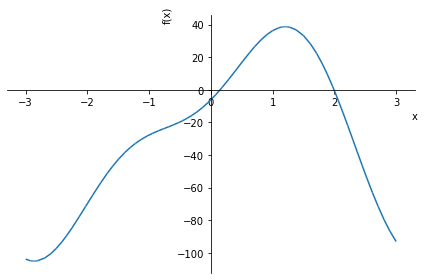

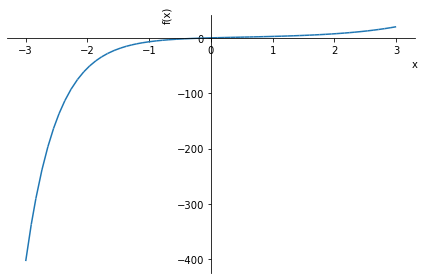

In [159]:
print_to_compare(S_2)

### n = 5

In [160]:
S_5 = S_n(5,1000,-3,3)
S_5

38.0233244719654*sin(x) - 44.667085397949*sin(2*x) + 38.9820471546976*sin(3*x) - 31.551692467262*sin(4*x) + 46.8339178794455*cos(x) - 22.5572585595501*cos(2*x) + 6.47512006011178*cos(3*x) + 2.38868481876482*cos(4*x) - 7.22639487165301*cos(5*x) - 30.385531787441

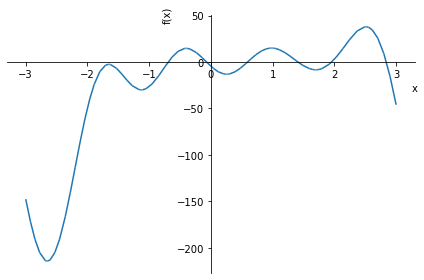

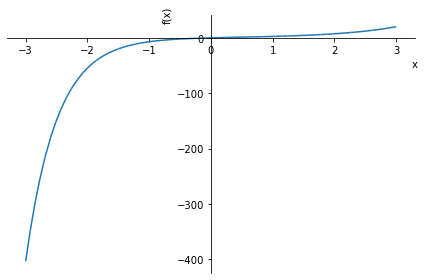

In [161]:
print_to_compare(S_5)

### n = 10

In [152]:
S_10 = S_n(10,1000,-3,3)
S_10

38.0233244719654*sin(x) - 44.667085397949*sin(2*x) + 38.9820471546976*sin(3*x) - 31.551692467262*sin(4*x) + 24.9125636609138*sin(5*x) - 19.3640073234597*sin(6*x) + 14.7584142318553*sin(7*x) - 10.9080895217708*sin(8*x) + 7.66140291269082*sin(9*x) + 46.8339178794455*cos(x) - 22.5572585595501*cos(2*x) + 6.47512006011178*cos(3*x) + 2.38868481876482*cos(4*x) - 7.22639487165301*cos(5*x) + 9.87021409790035*cos(6*x) - 11.2508275524605*cos(7*x) + 11.8542368923221*cos(8*x) - 11.9497682207099*cos(9*x) + 11.6968121808432*cos(10*x) - 30.385531787441

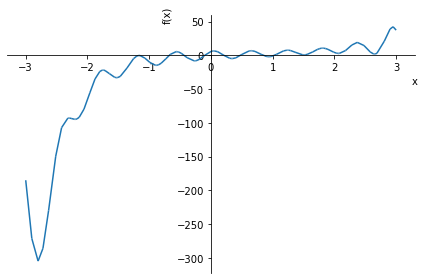

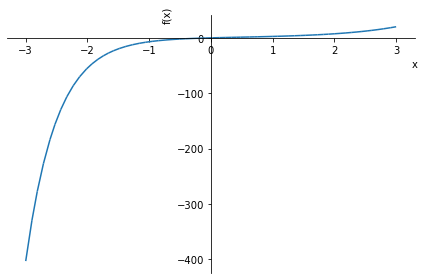

In [163]:
print_to_compare(S_10)

As the order n gets larger, the discrete trigonometric approximation interpolant fits the function better